<a href="https://colab.research.google.com/github/sw-programmer/Coursework1/blob/main/CW1_Q3_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  **Coursework 1**

1.   ### **Computationally Efficient Eigenfaces**
2.   ### **Incremental PCA**
3.   ### **PCA-LDA for Face Recognition**
4.   ### **K-means codebook**
5.   ### **RF classifier**


**by 20190223	Soohyun Ryu,	20190247	Sangwoo Park**






**1. Setting!**

In [1]:
import os
import time
# import torch
# import torch.nn as nn
# import torchvision.transforms as transforms
# import matplotlib.pyplot as plt
# import datetime
# import math
# import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import io
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
mat_file = io.loadmat("/content/drive/MyDrive/CV_ML/CW1/face.mat")
mat_X = mat_file['X']
mat_Y = mat_file['l'][0]

print(mat_file.keys()) 
print(mat_X.shape)                         # 총 52명. 각 10장의 사진. 

dict_keys(['__header__', '__version__', '__globals__', 'X', 'l'])
(2576, 520)


In [4]:
df = pd.DataFrame(data=mat_X).transpose()
df['label'] = mat_Y                         # row -> data, col -> feature
X = df.iloc[:, :-1].values
Y = df.iloc[:, -1].values                   # Target column

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    Y, 
                                                    test_size=0.2, 
                                                    shuffle=True,
                                                    stratify=Y, 
                                                    random_state=1004)          
# 얼굴 그룹 비율 유지               
# test/train ratio = 0.2
# random_state -> before dividing, seed for shuffling
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)
X_test_mean = np.mean(X_test, axis = 0)
X_train_mean = np.mean(X_train, axis = 0)
np.unique(y_train, return_counts=True)    # 52명의 얼굴이 80%씩 고르게 train set에 들어간 모습

X_train shape: (416, 2576)
X_test shape: (104, 2576)
y_train shape: (416,)
y_test shape: (104,)


(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
        52], dtype=uint8),
 array([8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
        8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
        8, 8, 8, 8, 8, 8, 8, 8]))

In [5]:
# NN Classfication
def NN(X_trained, X_fortest, y_pred):
  for query in X_fortest:
    Args = []
    for trained in X_trained:
      Args.append(np.linalg.norm(query - trained))
    y_pred.append(y_train[np.argmin(Args)])
  return accuracy_score(y_test, y_pred), y_pred

# 평균 얼굴 계산 함수 
def AvgCompute(X): 
  Xbar = np.mean(X, axis=0)  
  matrix_A = X - Xbar 
  return matrix_A, Xbar

# 고유값, 고유벡터 계산 함수
def eig(S): 
  eig_vals, eig_vecs = np.linalg.eig(S) 
  sort_indices = np.argsort(eig_vals)[::-1] # 내림차순 정렬 
  return eig_vals[sort_indices], eig_vecs[:, sort_indices]

# Reconstruction에 쓰일 함수
def reconstruct(X, PC): 
  return (X @ PC) @ PC.T

# PCA 과정
def PCA(X, num_components, low_dim = False): # X == train set, num_components == 선택할 eigen vector 개수
  start = time.time()
  N, D = X.shape 
  matrix_A, X_bar = AvgCompute(X)
  if not low_dim:
    S = (matrix_A.T @ matrix_A) / N
  else:
    S = (matrix_A @ matrix_A.T) / N

  eig_vals, eig_vecs = eig(S)
  principal_vals, principal_components = np.real(eig_vals[:num_components]), np.real(eig_vecs[:,:num_components]) 
  
  if low_dim:
    norm = np.linalg.norm(matrix_A.T @ principal_components, axis = 0)
    principal_components = ((matrix_A.T @ principal_components) / norm[np.newaxis, :])

  reconst_X = reconstruct(matrix_A, principal_components) + X_bar 
  comp_time = time.time() - start
  
  return reconst_X, X_bar, principal_vals, principal_components, comp_time

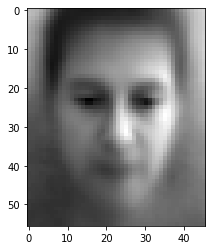

In [6]:
A, X_bar = AvgCompute(X_train) 
A = A.T

plt.imshow(np.reshape(X_bar,(46,56)).T, cmap = 'gist_gray') # 평균 얼굴 출력

## PCA Method


1/91
2/91
3/91
4/91
5/91
6/91
7/91
8/91
9/91
10/91
11/91
12/91
13/91
14/91
15/91
16/91
17/91
18/91
19/91
20/91
21/91
22/91
23/91
24/91
25/91
26/91
27/91
28/91
29/91
30/91
31/91
32/91
33/91
34/91
35/91
36/91
37/91
38/91
39/91
40/91
41/91
42/91
43/91
44/91
45/91
46/91
47/91
48/91
49/91
50/91
51/91
52/91
53/91
54/91
55/91
56/91
57/91
58/91
59/91
60/91
61/91
62/91
63/91
64/91
65/91
66/91
67/91
68/91
69/91
70/91
71/91
72/91
73/91
74/91
75/91
76/91
77/91
78/91
79/91
80/91
81/91
82/91
83/91
84/91
85/91
86/91
87/91
88/91
89/91
90/91
91/91


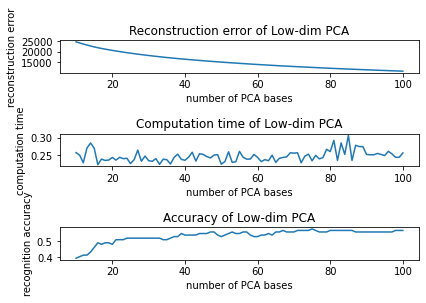

average computation time = 0.24767237443190354


In [10]:
# number of PCA bases 바꾸면서 reconstruction error 측정
max_num = 100
start_num = 10
error_list = []
computation_time = []
accuracy = []

os.makedirs("./PCA_org", exist_ok=True)
os.makedirs("./PCA_low_dim", exist_ok=True)

# Original PCA / Low-dim PCA
low_dim=True
# low_dim=True
if low_dim:
    root_path = "./PCA_low_dim"
else:
    root_path = "./PCA_org"

for i in range(start_num, max_num+1):
    reconst_X, X_bar, principal_vals, principal_components, comp_time = PCA(X_train, i, low_dim)
    recon_loss = np.linalg.norm((X_train - reconst_X), None)
    error_list.append(recon_loss)
    acc, y_predd = NN((X_train - X_bar) @ principal_components, (X_test - X_test_mean) @ principal_components, [])
    accuracy.append(acc)
    computation_time.append(comp_time)
    # To see the reconstructed images
    plt.imsave(f"{root_path}/{i}_recon.png", np.reshape(reconst_X[0,:],(46,56)).T, cmap = 'gist_gray')
    print(f"{i-start_num+1}/{max_num-start_num+1}")

if not low_dim:
    PCA_name = "Original PCA"
else:
    PCA_name = "Low-dim PCA"

x_axis = list(range(start_num, max_num+1))
fig_recon, ax_recon = plt.subplots(3,1)
ax_recon[0].plot(x_axis, error_list)
ax_recon[0].set_xlabel("number of PCA bases")
ax_recon[0].set_ylabel("reconstruction error")
ax_recon[0].set_title(f"Reconstruction error of {PCA_name}")

ax_recon[1].plot(x_axis, computation_time)
ax_recon[1].set_xlabel("number of PCA bases")
ax_recon[1].set_ylabel("computation time")
ax_recon[1].set_title(f"Computation time of {PCA_name}")

ax_recon[2].plot(x_axis, accuracy)
ax_recon[2].set_xlabel("number of PCA bases")
ax_recon[2].set_ylabel("recognition accuracy")
ax_recon[2].set_title(f"Accuracy of {PCA_name}")

fig_recon.tight_layout(pad=1.0)

plt.show()

print(f"average computation time = {np.mean(computation_time)}")

In [11]:
print(principal_components.shape)

(2576, 100)


## PCA-LDA Method

In [7]:
def LDA(X, pc, num_lda): 
  sort_indices = np.argsort(y_train)
  undo_indices = np.argsort(sort_indices)
  y_train_sorted = y_train[sort_indices]
  X_train_sorted = X_train[sort_indices]

  meanlist = []
  j = 0
  for i in range(52):
    mean = np.mean(X_train_sorted[j:j+8,:], axis=0)
    meanlist.append(mean)
    j = j+8  

  start = time.time()
  # Between class scatter matrix
  mean_global = np.mean(meanlist, axis = 0)
  meanlist_sub = np.array([(i-mean_global) for i in meanlist])
  S_bet = 8 * meanlist_sub.T @ meanlist_sub

  # Within class scatter matrix
  within_sub = []
  j=0
  for i in range(52):
    within_sub.append(np.subtract(X_train_sorted[j:j+8,:], meanlist[i]))
    j = j+8
  within_sub = np.array([(i.T @ i) for i in within_sub])
  S_with = np.sum(within_sub, axis = 0)

  if(np.linalg.matrix_rank(pc) < pc.shape[1]):
    pc = np.unique(pc, axis=1)
    # print(f"rank of feature matrix is {np.linalg.matrix_rank(pc)}")
  else:
    pass
  
  # print(f"Rank of S_between : {np.linalg.matrix_rank(S_bet)}")
  # print(f"Rank of S_within : {np.linalg.matrix_rank(S_with)}")

  # 1. PCA
  S_bet_PCA = pc.T @ S_bet @ pc
  S_with_PCA = pc.T @ S_with @ pc

  # 2. LDA
  discriminant_vals, discriminant_components = eig((np.linalg.inv(S_with_PCA) @ S_bet_PCA))
  discriminant_vals, discriminant_components = np.real(discriminant_vals[:num_lda]), np.real(discriminant_components[:,:num_lda]) 
  
  comp_time = time.time() - start

  return discriminant_components, discriminant_vals, pc, comp_time


def PCA_LDA(X, num_pca, num_lda):
  reconst_X, X_bar, principal_vals, principal_components, comp_time = PCA(X, num_pca, True)
  return LDA(X, principal_components, num_lda)

In [9]:
import torch
torch.cuda.is_available()

True

In [34]:
# hyper-param 바꾸면서 accuracy 측정
M_pca = 364
M_lda = 51
pca_start_num = 51
lda_start_num = 10
accuracy_list = []
computation_time = []
memory_usage = []

# Original PCA / Low-dim PCA
low_dim=True
PCA_name = "Low-dim PCA"

# First, find optimal M_pca
for i in range(pca_start_num, M_pca+1):
  discriminant_components, discriminant_vals, principal_components_lda, comp_time = PCA_LDA(X_train, i, M_lda)
  computation_time.append(comp_time)
  X_train_pca = (X_train - X_bar) @ principal_components_lda
  X_test_pca = (X_test - X_test_mean) @ principal_components_lda
  result, y_pred = NN(X_train_pca @ discriminant_components, X_test_pca @ discriminant_components, [])
  accuracy_list.append(result)
  if i % 10 == 0:
    print(f"M_pca : {i-pca_start_num+1}/{M_pca-pca_start_num+1}")

# print(f"average computation time = {np.mean(computation_time)}")

M_pca : 10/314
M_pca : 20/314
M_pca : 30/314
M_pca : 40/314
M_pca : 50/314
M_pca : 60/314
M_pca : 70/314
M_pca : 80/314
M_pca : 90/314
M_pca : 100/314
M_pca : 110/314
M_pca : 120/314
M_pca : 130/314
M_pca : 140/314
M_pca : 150/314
M_pca : 160/314
M_pca : 170/314
M_pca : 180/314
M_pca : 190/314
M_pca : 200/314
M_pca : 210/314
M_pca : 220/314
M_pca : 230/314
M_pca : 240/314
M_pca : 250/314
M_pca : 260/314
M_pca : 270/314
M_pca : 280/314
M_pca : 290/314
M_pca : 300/314
M_pca : 310/314


average computation time = 3.1903776838665916


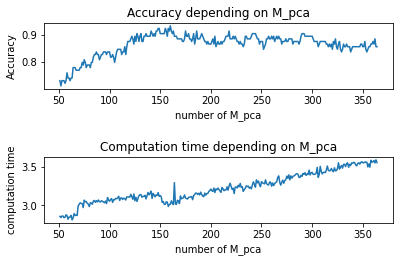

In [45]:
x_axis = list(range(pca_start_num, M_pca+1))
fig_recon, ax_recon = plt.subplots(2,1)
ax_recon[0].plot(x_axis, accuracy_list)
ax_recon[0].set_xlabel("number of M_pca")
ax_recon[0].set_ylabel("Accuracy")
ax_recon[0].set_title(f"Accuracy depending on M_pca")

ax_recon[1].plot(x_axis, computation_time)
ax_recon[1].set_xlabel("number of M_pca")
ax_recon[1].set_ylabel("computation time")
ax_recon[1].set_title(f"Computation time depending on M_pca")

fig_recon.tight_layout(pad=2.0)
print(f"average computation time = {np.mean(computation_time_lda)}")

In [46]:
Optimal_M_pca = np.argmax(accuracy_list) + 51
print(Optimal_M_pca)

160


M_lda : 1/42
M_lda : 2/42
M_lda : 3/42
M_lda : 4/42
M_lda : 5/42
M_lda : 6/42
M_lda : 7/42
M_lda : 8/42
M_lda : 9/42
M_lda : 10/42
M_lda : 11/42
M_lda : 12/42
M_lda : 13/42
M_lda : 14/42
M_lda : 15/42
M_lda : 16/42
M_lda : 17/42
M_lda : 18/42
M_lda : 19/42
M_lda : 20/42
M_lda : 21/42
M_lda : 22/42
M_lda : 23/42
M_lda : 24/42
M_lda : 25/42
M_lda : 26/42
M_lda : 27/42
M_lda : 28/42
M_lda : 29/42
M_lda : 30/42
M_lda : 31/42
M_lda : 32/42
M_lda : 33/42
M_lda : 34/42
M_lda : 35/42
M_lda : 36/42
M_lda : 37/42
M_lda : 38/42
M_lda : 39/42
M_lda : 40/42
M_lda : 41/42
M_lda : 42/42


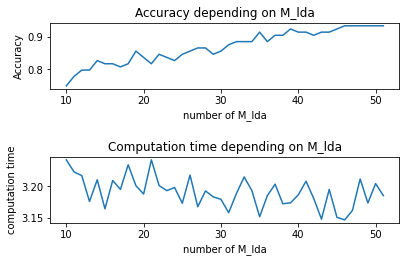

In [42]:
# And then find best M_lda with optimal M_pca
accuracy_list_lda = []
computation_time_lda = []
memory_usage_lda = []


for i in range(lda_start_num, M_lda+1):
  discriminant_components, discriminant_vals, principal_components_lda, comp_time = PCA_LDA(X_train, Optimal_M_pca, i)
  computation_time_lda.append(comp_time)
  X_train_pca = (X_train - X_bar) @ principal_components_lda
  X_test_pca = (X_test - X_test_mean) @ principal_components_lda
  result, y_pred = NN(X_train_pca @ discriminant_components, X_test_pca @ discriminant_components, [])
  accuracy_list_lda.append(result)
  print(f"M_lda : {i-lda_start_num+1}/{M_lda-lda_start_num+1}")

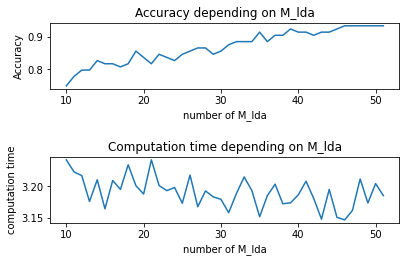

average computation time = 3.1903776838665916


In [47]:
x_axis = list(range(lda_start_num, M_lda+1))
fig_recon, ax_recon = plt.subplots(2,1)
ax_recon[0].plot(x_axis, accuracy_list_lda)
ax_recon[0].set_xlabel("number of M_lda")
ax_recon[0].set_ylabel("Accuracy")
ax_recon[0].set_title(f"Accuracy depending on M_lda")

ax_recon[1].plot(x_axis, computation_time_lda)
ax_recon[1].set_xlabel("number of M_lda")
ax_recon[1].set_ylabel("computation time")
ax_recon[1].set_title(f"Computation time depending on M_lda")

fig_recon.tight_layout(pad=2.0)

plt.show()
print(f"average computation time = {np.mean(computation_time_lda)}")

Rank of S_between : 51
Rank of S_within : 364
PCA-LDA computation time = 14.404451131820679
0.9326923076923077


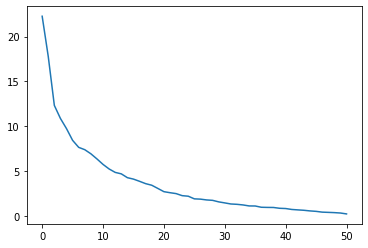

In [51]:
# Caculate accuracy when M_pca == 160
discriminant_components, discriminant_vals, principal_components_lda, comp_time = PCA_LDA(X_train, 160, 51)  

x_axis = list(range(0, 51))
plt.plot(x_axis, discriminant_vals)
print(f"PCA-LDA computation time = {comp_time}")

X_train_pca = (X_train - X_bar) @ principal_components_lda
X_test_pca = (X_test - X_test_mean) @ principal_components_lda
result, y_pred = NN(X_train_pca @ discriminant_components, X_test_pca @ discriminant_components, [])
print(result)

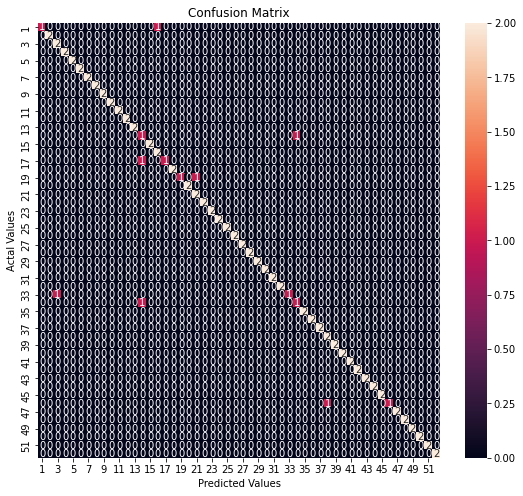

              precision    recall  f1-score   support

           1      1.000     0.500     0.667         2
           2      1.000     1.000     1.000         2
           3      0.667     1.000     0.800         2
           4      1.000     1.000     1.000         2
           5      1.000     1.000     1.000         2
           6      1.000     1.000     1.000         2
           7      1.000     1.000     1.000         2
           8      1.000     1.000     1.000         2
           9      1.000     1.000     1.000         2
          10      1.000     1.000     1.000         2
          11      1.000     1.000     1.000         2
          12      1.000     1.000     1.000         2
          13      1.000     1.000     1.000         2
          14      0.333     0.500     0.400         2
          15      1.000     1.000     1.000         2
          16      0.667     1.000     0.800         2
          17      1.000     0.500     0.667         2
          18      1.000    

In [66]:
# Confushion Matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm,
                     index = range(1,53), 
                     columns = range(1,53))

#Plotting the confusion matrix
plt.figure(figsize=(9,8))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, digits=3))

## PCA-LDA Ensemble

In [8]:
def softmax(a) :
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

a = np.array([0.3, 2.9, 4.0])

print(softmax(a)) # softmax 결과값 출력
print(sum(softmax(a))) # softmax 결과값들의 합은 1이 된다.

[0.01821127 0.24519181 0.73659691]
1.0


In [241]:
from collections import Counter
from sklearn.neighbors import KNeighborsClassifier
# PCA first
reconst_X, X_bar, principal_vals, principal_components, comp_time = PCA(X_train, 415, True)
idx_list = []

def PCA_LDA_ensemble(X, T, M0, M1, Mlda, Fusion): 
  # Randim Subspaces
  pc_M0 = principal_components[:,:M0]
  pc_M1_origin = principal_components[:,M0:]

  scorelist = []
  predictlist = []
  problist = []
  # seed = 150
  for i in range(T):
    # np.random.seed(seed)
    idx = np.random.randint(415-M0, size=M1)
    pc_M1 = pc_M1_origin[:,idx]
    pc_Mpca = np.concatenate((pc_M0, pc_M1), axis=1)
    discriminant_components, discriminant_vals, pc, comp_time = LDA(X, pc_Mpca, Mlda) 

    X_train_pca = (X - X_bar) @ pc  
    X_test_pca = (X_test - X_test_mean) @ pc
    if (Fusion == 'Majority'):
      score, y_pred = NN(X_train_pca @ discriminant_components, X_test_pca @ discriminant_components, [])
      scorelist.append(score)
      predictlist.append(y_pred)
    else:
      neigh = KNeighborsClassifier(n_neighbors=10)
      neigh.fit(X_train_pca @ discriminant_components, y_train)
      prob = neigh.predict_proba(X_test_pca @ discriminant_components)
      problist.append(prob)
      # problist -> T x 104 x 52
    
    # seed = seed + 1

  # idx_list.append(idx_sublist)
  # majority vote
  if (Fusion == 'Majority'):
    predictlist = np.array(predictlist)
    y_pred_voted = []
    for i in range(len(X_test)):
      candidate = predictlist[:,i]
      c = Counter(candidate)
      y_pred_voted.append(c.most_common(1)[0][0])

    avgError_individual = np.array(scorelist)
    Error_committee = accuracy_score(y_test, y_pred_voted)

    return Error_committee, avgError_individual, y_pred_voted

  # Sum(Avg)
  else:
    prob_sum = np.sum(np.array(problist),axis=0)
    prob_result = prob_sum/T
    y_pred_result = []
    for i in prob_result:
      y_pred_result.append(np.argmax(i)+1)


    return y_pred_result, problist


In [47]:
# hyper-param 바꾸면서 accuracy 측정

M0_start_num = 100
Total_com_accuracy_list = []
Total_avg_accuracy_list = []
Total_perdict_list = []

while M0_start_num <= 160:
  Each_com_accuracy_list = []
  Each_avg_accuracy_list = []
  Each_predict_list = []
  M1_start_num = 20
  while M0_start_num + M1_start_num <= 320:
    err_committee, err_individual, y_pred = PCA_LDA_ensemble(X_train, 10, M0_start_num, M1_start_num, 51, 'Majority')
    Each_com_accuracy_list.append(err_committee)
    Each_avg_accuracy_list.append(err_individual)
    Each_predict_list.append(y_pred)
    print(f"M0:{M0_start_num}, M1:{M1_start_num}")
    M1_start_num += 20
    if M0_start_num + M1_start_num == 330:
      err_committee, err_individual, y_pred = PCA_LDA_ensemble(X_train, 10, M0_start_num, M1_start_num, 51, 'Majority')
      Each_com_accuracy_list.append(err_committee)
      Each_avg_accuracy_list.append(err_individual)
      Each_predict_list.append(y_pred)
      print(f"M0:{M0_start_num}, M1:{M1_start_num}")
      break
  Total_com_accuracy_list.append(Each_com_accuracy_list)
  Total_avg_accuracy_list.append(Each_avg_accuracy_list)
  Total_perdict_list.append(Each_predict_list)
  M0_start_num += 10


M0:100, M1:20
M0:100, M1:40
M0:100, M1:60
M0:100, M1:80
M0:100, M1:100
M0:100, M1:120
M0:100, M1:140
M0:100, M1:160
M0:100, M1:180
M0:100, M1:200
M0:100, M1:220
M0:110, M1:20
M0:110, M1:40
M0:110, M1:60
M0:110, M1:80
M0:110, M1:100
M0:110, M1:120
M0:110, M1:140
M0:110, M1:160
M0:110, M1:180
M0:110, M1:200
M0:110, M1:220
M0:120, M1:20
M0:120, M1:40
M0:120, M1:60
M0:120, M1:80
M0:120, M1:100
M0:120, M1:120
M0:120, M1:140
M0:120, M1:160
M0:120, M1:180
M0:120, M1:200
M0:130, M1:20
M0:130, M1:40
M0:130, M1:60
M0:130, M1:80
M0:130, M1:100
M0:130, M1:120
M0:130, M1:140
M0:130, M1:160
M0:130, M1:180
M0:130, M1:200
M0:140, M1:20
M0:140, M1:40
M0:140, M1:60
M0:140, M1:80
M0:140, M1:100
M0:140, M1:120
M0:140, M1:140
M0:140, M1:160
M0:140, M1:180
M0:150, M1:20
M0:150, M1:40
M0:150, M1:60
M0:150, M1:80
M0:150, M1:100
M0:150, M1:120
M0:150, M1:140
M0:150, M1:160
M0:150, M1:180
M0:160, M1:20
M0:160, M1:40
M0:160, M1:60
M0:160, M1:80
M0:160, M1:100
M0:160, M1:120
M0:160, M1:140
M0:160, M1:160


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


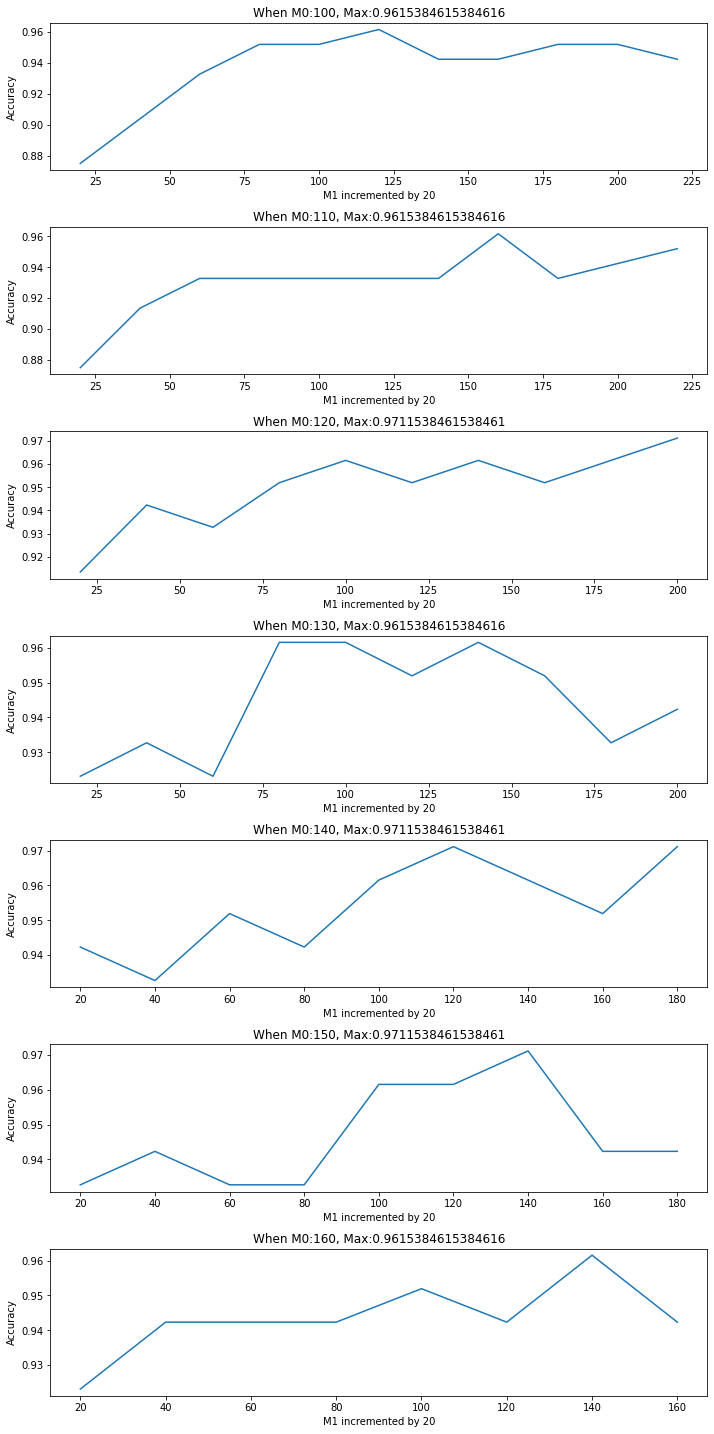

In [48]:
fig_recon, ax_recon = plt.subplots(7,1, figsize = (10,20))
print(list(range(1,len(Total_com_accuracy_list[0])+1)))
for i in range(7):
  ax_recon[i].plot([20*i for i in list(range(1,len(Total_com_accuracy_list[i])+1))], Total_com_accuracy_list[i])
  ax_recon[i].set_xlabel("M1 incremented by 20")
  ax_recon[i].set_ylabel("Accuracy")
  ax_recon[i].set_title(f"When M0:{100 + i*10}, Max:{max(Total_com_accuracy_list[i])}")
fig_recon.tight_layout(pad=1.0)

In [ ]:
## Confushion Matrix
# import seaborn as sns
# from sklearn.metrics import confusion_matrix

# cm = confusion_matrix(y_test, y_pred)
# cm_df = pd.DataFrame(cm,
#                      index = range(1,53), 
#                      columns = range(1,53))

# plt.figure(figsize=(9,8))
# sns.heatmap(cm_df, annot=True)
# plt.title('Confusion Matrix')
# plt.ylabel('Actal Values')
# plt.xlabel('Predicted Values')
# plt.show()

# from sklearn import metrics
# print(metrics.classification_report(y_test, y_pred, digits=3))

In [10]:
Err_130_60 = []
Err_120_60 = []
Err_110_60 = []

for i in range(1, 11):
  err_committee, err_individual, y_pred = PCA_LDA_ensemble(X_train, 10*i, 130, 60, 51, 'Majority')
  Err_130_60.append(err_committee)
  err_committee, err_individual, y_pred = PCA_LDA_ensemble(X_train, 10*i, 120, 60, 51, 'Majority')
  Err_120_60.append(err_committee)
  err_committee, err_individual, y_pred = PCA_LDA_ensemble(X_train, 10*i, 110, 60, 51, 'Majority')
  Err_110_60.append(err_committee)
  print(f"Number of model is:{10*i}")

Number of model is:10
Number of model is:20
Number of model is:30
Number of model is:40
Number of model is:50
Number of model is:60
Number of model is:70
Number of model is:80
Number of model is:90
Number of model is:100


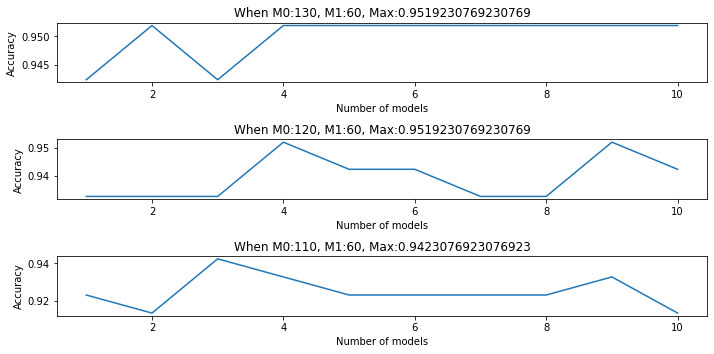

In [12]:
fig_recon, ax_recon = plt.subplots(3,1, figsize = (10,5))

x_axis = range(1,11)
ax_recon[0].plot(x_axis, Err_130_60)
ax_recon[0].set_xlabel("Number of models")
ax_recon[0].set_ylabel("Accuracy")
ax_recon[0].set_title(f"When M0:130, M1:60, Max:{max(Err_130_60)}")

ax_recon[1].plot(x_axis, Err_120_60)
ax_recon[1].set_xlabel("Number of models")
ax_recon[1].set_ylabel("Accuracy")
ax_recon[1].set_title(f"When M0:120, M1:60, Max:{max(Err_120_60)}")

ax_recon[2].plot(x_axis, Err_110_60)
ax_recon[2].set_xlabel("Number of models")
ax_recon[2].set_ylabel("Accuracy")
ax_recon[2].set_title(f"When M0:110, M1:60, Max:{max(Err_110_60)}")

fig_recon.tight_layout(pad=1.0)

In [206]:
result_committee_1, result_individual_1 = PCA_LDA_ensemble(X_train, 10, 120, 200, 51, 'Sum')

In [207]:
# comparison between comm / individual
result_committee_2, result_individual_2 = PCA_LDA_ensemble(X_train, 30, 120, 200, 51, 'Sum')

In [208]:
result_committee_3, result_individual_3 = PCA_LDA_ensemble(X_train, 50, 120, 200, 51, 'Sum')

In [209]:
result_committee_1_1, result_individual_1_1 = PCA_LDA_ensemble(X_train, 30, 50, 250, 51, 'Sum')

In [210]:
result_committee_1_2, result_individual_1_2 = PCA_LDA_ensemble(X_train, 30, 200, 100, 51, 'Sum')

In [212]:
result_committee_1_3, result_individual_1_3 = PCA_LDA_ensemble(X_train, 30, 300, 50, 51, 'Sum')

In [239]:
print(accuracy_score(result_committee_2, y_test))

0.9711538461538461


In [211]:
def calculate_error(com, indi):
  # avg
  y_pred_avg = []
  for i in indi:
    y_pred_individual = []
    for j in range(104):
      y_pred_individual.append(np.argmax(i[j])+1)
    y_pred_avg.append(y_pred_individual)

  accu_list = []
  for i in y_pred_avg:
    accu_list.append(1 - accuracy_score(i, y_test))

  result_1 = np.sum(np.array(accu_list))/30 
  result_2 = 1 - accuracy_score(com, y_test)
  return result_1, result_2

In [237]:
i_1, c_1 = calculate_error(result_committee_1, result_individual_1)
i_2, c_2 = calculate_error(result_committee_2, result_individual_2)
i_3, c_3 = calculate_error(result_committee_3, result_individual_3)
i_1_1, c_1_1 = calculate_error(result_committee_1_1, result_individual_1_1)
i_1_2, c_1_2 = calculate_error(result_committee_1_2, result_individual_1_2)
i_1_3, c_1_3 = calculate_error(result_committee_1_3, result_individual_1_3)

0.028846153846153855


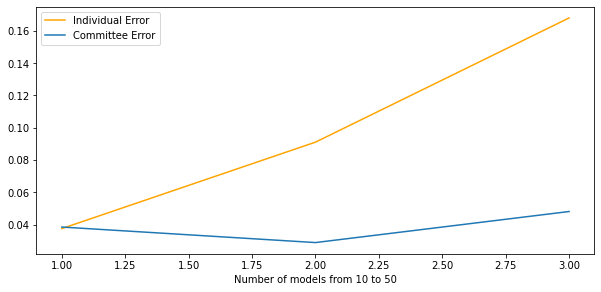

In [235]:
x_axis = range(1,4)
fig = plt.figure(figsize = (10,10))
ax1 = fig.add_subplot(211)
ax1.plot(x_axis, [i_1, i_2, i_3], color='orange', label='Individual Error')	
ax1.plot(x_axis, [c_1,c_2,c_3], label='Committee Error')
plt.xlabel('Number of models from 10 to 50')
plt.legend()

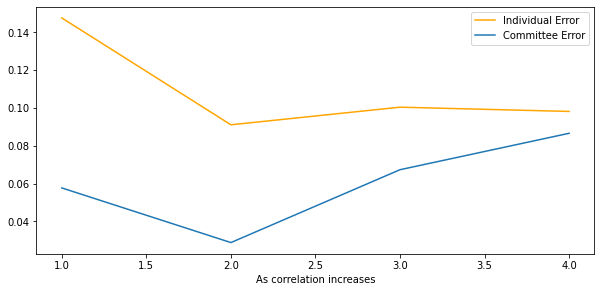

In [236]:
x_axis = range(1,5)
fig = plt.figure(figsize = (10,10))
ax1 = fig.add_subplot(211)
ax1.plot(x_axis, [i_1_1, i_2, i_1_2, i_1_3], color='orange', label='Individual Error')	
ax1.plot(x_axis, [c_1_1, c_2, c_1_2, c_1_3], label='Committee Error')
plt.xlabel('As correlation increases')
plt.legend()

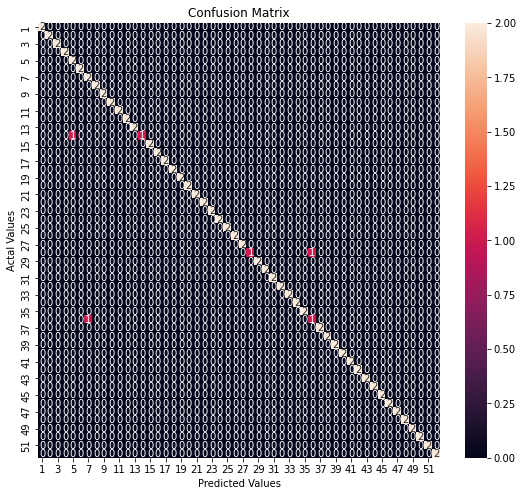

              precision    recall  f1-score   support

           1      1.000     1.000     1.000         2
           2      1.000     1.000     1.000         2
           3      1.000     1.000     1.000         2
           4      1.000     1.000     1.000         2
           5      0.667     1.000     0.800         2
           6      1.000     1.000     1.000         2
           7      0.667     1.000     0.800         2
           8      1.000     1.000     1.000         2
           9      1.000     1.000     1.000         2
          10      1.000     1.000     1.000         2
          11      1.000     1.000     1.000         2
          12      1.000     1.000     1.000         2
          13      1.000     1.000     1.000         2
          14      1.000     0.500     0.667         2
          15      1.000     1.000     1.000         2
          16      1.000     1.000     1.000         2
          17      1.000     1.000     1.000         2
          18      1.000    

In [243]:
# Confushion Matrix of best case
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, result_committee_2)
cm_df = pd.DataFrame(cm,
                     index = range(1,53), 
                     columns = range(1,53))

#Plotting the confusion matrix
plt.figure(figsize=(9,8))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

from sklearn import metrics
print(metrics.classification_report(y_test, result_committee_2, digits=3))

In [106]:
# seed(80)
y_pred_sum_1, problist = PCA_LDA_ensemble(X_train, 10, 10, 200, 51, 'Sum')
err_committee_1, err_individual, y_pred_vote = PCA_LDA_ensemble(X_train, 10, 10, 200, 51, 'Majority')

In [112]:
# seed(200)
y_pred_sum_1_1, problist = PCA_LDA_ensemble(X_train, 30, 10, 200, 51, 'Sum')
err_committee_1_1, err_individual, y_pred_vote = PCA_LDA_ensemble(X_train, 30, 10, 200, 51, 'Majority')

In [114]:
# seed(150)
y_pred_sum_1_2, problist = PCA_LDA_ensemble(X_train, 50, 10, 200, 51, 'Sum')
err_committee_1_2, err_individual, y_pred_vote = PCA_LDA_ensemble(X_train, 50, 10, 200, 51, 'Majority')

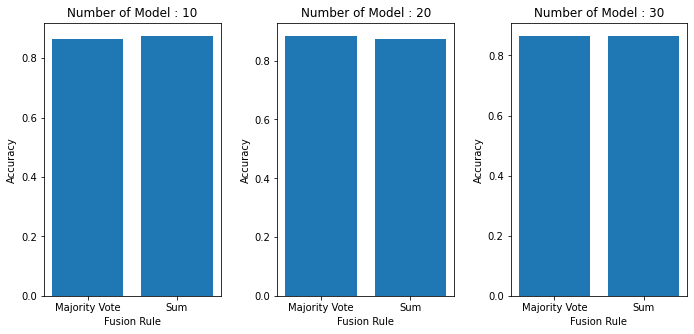

In [115]:
x_axis = range(2)
fusion = ['Majority Vote', "Sum"]
values_1 = [err_committee_1 ,accuracy_score(y_test, y_pred_sum_1)]
values_1_1 = [err_committee_1_1 ,accuracy_score(y_test, y_pred_sum_1_1)]
values_1_2 = [err_committee_1_2 ,accuracy_score(y_test, y_pred_sum_1_2)]

plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
plt.bar(x_axis, values_1)
plt.xticks(x_axis, fusion)
plt.xlabel("Fusion Rule")
plt.ylabel("Accuracy")
plt.title("Number of Model : 10")

plt.subplot(1,3,2)
plt.bar(x_axis, values_1_1)
plt.xticks(x_axis, fusion)
plt.xlabel("Fusion Rule")
plt.ylabel("Accuracy")
plt.title("Number of Model : 20")

plt.subplot(1,3,3)
plt.bar(x_axis, values_1_2)
plt.xticks(x_axis, fusion)
plt.xlabel("Fusion Rule")
plt.ylabel("Accuracy")
plt.title("Number of Model : 30")


plt.tight_layout(pad=2.0)

In [90]:
# random seed(1004)
y_pred_sum_2, problist = PCA_LDA_ensemble(X_train, 10, 80, 130, 51, 'Sum')
err_committee_2, err_individual, y_pred_vote = PCA_LDA_ensemble(X_train, 10, 80, 130, 51, 'Majority')

In [92]:
# random seed(413)
y_pred_sum_3, problist = PCA_LDA_ensemble(X_train, 10, 100, 100, 51, 'Sum')
err_committee_3, err_individual, y_pred_vote = PCA_LDA_ensemble(X_train, 10, 100, 100, 51, 'Majority')

In [94]:
# random seed(1)
y_pred_sum_4, problist = PCA_LDA_ensemble(X_train, 10, 130, 70, 51, 'Sum')
err_committee_4, err_individual, y_pred_vote = PCA_LDA_ensemble(X_train, 10, 130, 70, 51, 'Majority')

In [96]:
# random seed(416)
y_pred_sum_5, problist = PCA_LDA_ensemble(X_train, 10, 150, 50, 51, 'Sum')
err_committee_5, err_individual, y_pred_vote = PCA_LDA_ensemble(X_train, 10, 150, 50, 51, 'Majority')

In [109]:
# random seed(100)
y_pred_sum_6, problist = PCA_LDA_ensemble(X_train, 10, 200, 50, 51, 'Sum')
err_committee_6, err_individual, y_pred_vote = PCA_LDA_ensemble(X_train, 10, 200, 50, 51, 'Majority')

0.9615384615384616


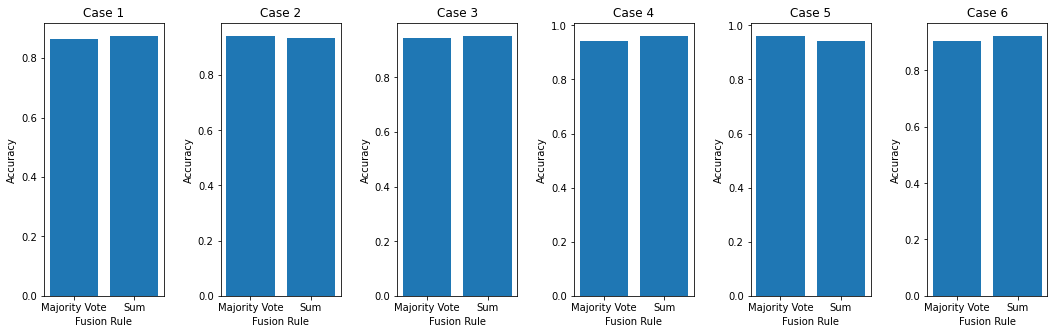

In [117]:
x_axis = range(2)
fusion = ['Majority Vote', "Sum"]
values_1 = [err_committee_1 ,accuracy_score(y_test, y_pred_sum_1)]
values_2 = [err_committee_2 ,accuracy_score(y_test, y_pred_sum_2)]
values_3 = [err_committee_3 ,accuracy_score(y_test, y_pred_sum_3)]
values_4 = [err_committee_4 ,accuracy_score(y_test, y_pred_sum_4)]
values_5 = [err_committee_5 ,accuracy_score(y_test, y_pred_sum_5)]
values_6 = [err_committee_6 ,accuracy_score(y_test, y_pred_sum_6)]

plt.figure(figsize=(15,5))
plt.subplot(1,6,1)
plt.bar(x_axis, values_1)
plt.xticks(x_axis, fusion)
plt.xlabel("Fusion Rule")
plt.ylabel("Accuracy")
plt.title("Case 1")

plt.subplot(1,6,2)
plt.bar(x_axis, values_2)
plt.xticks(x_axis, fusion)
plt.xlabel("Fusion Rule")
plt.ylabel("Accuracy")
plt.title("Case 2")

plt.subplot(1,6,3)
plt.bar(x_axis, values_3)
plt.xticks(x_axis, fusion)
plt.xlabel("Fusion Rule")
plt.ylabel("Accuracy")
plt.title("Case 3")

plt.subplot(1,6,4)
plt.bar(x_axis, values_4)
plt.xticks(x_axis, fusion)
plt.xlabel("Fusion Rule")
plt.ylabel("Accuracy")
plt.title("Case 4")

plt.subplot(1,6,5)
plt.bar(x_axis, values_5)
plt.xticks(x_axis, fusion)
plt.xlabel("Fusion Rule")
plt.ylabel("Accuracy")
plt.title("Case 5")

plt.subplot(1,6,6)
plt.bar(x_axis, values_6)
plt.xticks(x_axis, fusion)
plt.xlabel("Fusion Rule")
plt.ylabel("Accuracy")
plt.title("Case 6")


plt.tight_layout(pad=2.0)

In [ ]:
err_committee_2, err_individual, y_pred_vote = PCA_LDA_ensemble(X_train, 10, 80, 130, 51, 'Majority')